In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
from getpass import getpass
from dotenv import load_dotenv


load_dotenv("../.env")

def _getpass(env_var: str):
    if not os.environ.get(env_var):
        os.environ[env_var] = getpass(f"{env_var}=")


_getpass("OPENAI_API_KEY")

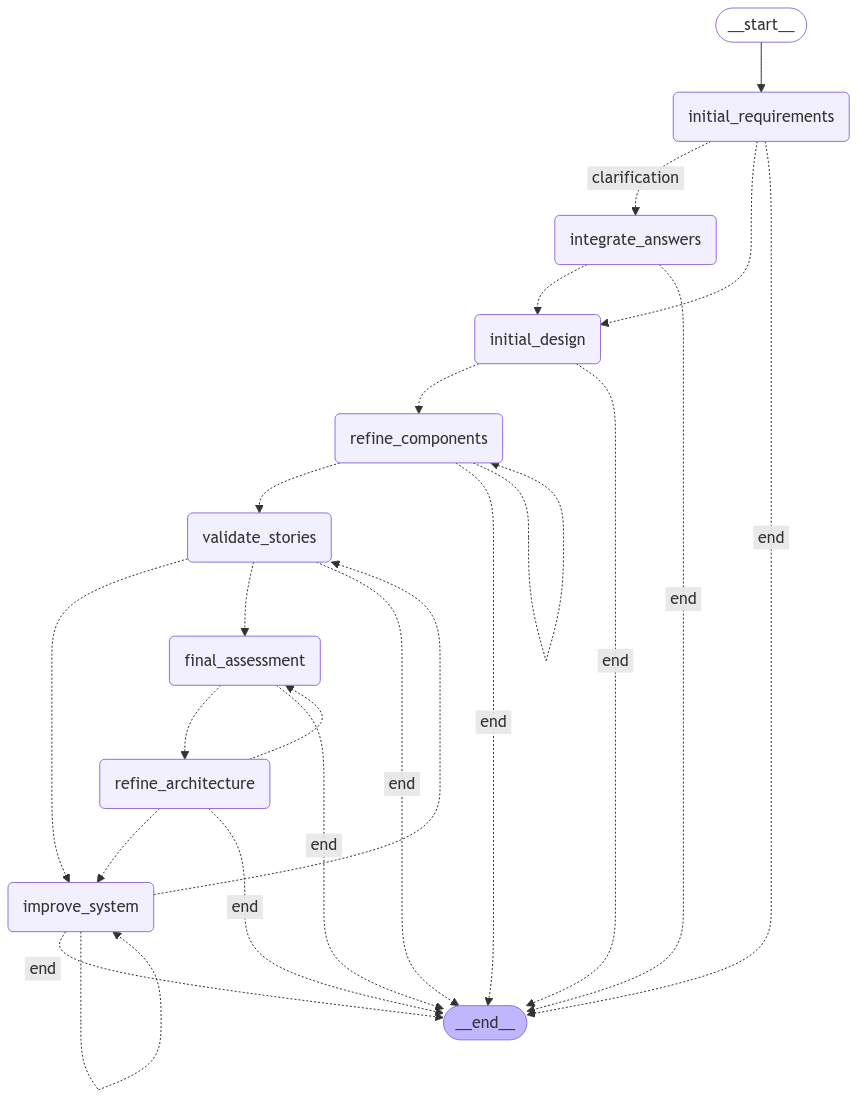

In [6]:
from agents import build_architecture_design_graph
from langgraph.checkpoint.memory import MemorySaver
from langgraph.types import interrupt, Command

from state import State

workflow = build_architecture_design_graph()
app = workflow.compile()

from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [ ]:
from agents import build_architecture_design_graph
from langgraph.checkpoint.memory import MemorySaver
from langgraph.types import interrupt, Command

from state import State

workflow = build_architecture_design_graph()
app = workflow.compile()



thread_config = {"configurable": {"thread_id": "1"}}
checkpointer = MemorySaver()
app = workflow.compile(checkpointer=checkpointer)

initial_state = State(project_description="""
Project: Customer Relationship Management System with Integrated E-commerce
Our mid-sized clothing retail business (15 physical stores across the Northeast and a growing online presence) needs a comprehensive CRM system to better manage our customer relationships and integrate with our existing e-commerce platform.
Currently, we're using a combination of spreadsheets, email marketing tools, and our e-commerce platform's basic customer features, but we need a unified solution. We want to track customer interactions across channels (in-store, online, customer service), personalize marketing campaigns, and improve our loyalty program.
The system should allow our sales staff to access customer purchase history and preferences, enable marketing to segment customers for targeted campaigns, and provide management with sales analytics and reporting. It should also integrate with our existing Shopify e-commerce platform and POS systems.
We have approximately 50,000 active customers, process about 2,000 transactions daily, and send marketing campaigns weekly. Our IT team has experience with cloud-based solutions, and we prefer a solution that doesn't require significant on-premise infrastructure.
Budget is a consideration, but we're willing to invest in a solution that will scale with our business as we plan to expand to 25 stores within three years and double our online sales.
""")

final_state = await app.ainvoke(initial_state, config=thread_config)
state = app.get_state(thread_config)
tasks = state.tasks[0].interrupts[0].value


if tasks["interrupt_type"] == "questions":
    answers = {}
    for question in tasks["questions"]:
        print(f"Question: {question}")
        answer = input("Answer: ")
        answers[question] = answer

    final_state = await app.ainvoke(Command(resume=answer), config=thread_config)

final_state



CancelledError: 